# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Brendi Kargel

https://github.com/bkargel/44620-80-article-summarizer-kargel

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
from bs4 import BeautifulSoup
import requests
import pickle

article_page = requests.get('https://www.history.com/topics/christmas/history-of-christmas')
article_html = article_page.text

with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")
doc = nlp(article_element.get_text())
sentences = list(doc.sents)

print("Polarity: ", doc._.blob.polarity)
print("Sentence Count: ", len(sentences))

Polarity:  0.17163110366336176
Sentence Count:  86


# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
from collections import Counter

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.lower_ for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print("The article's 5 most common tokens and their frequencies are:", word_freq.most_common(5))

The article's 5 most common tokens and their frequencies are: [('christmas', 55), ('holiday', 20), ('celebrated', 12), ('winter', 11), ('time', 10)]


# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("The article's 5 most common lemmas and their frequencies are:",lemma_freq.most_common(5))

The article's 5 most common lemmas and their frequencies are: [('christmas', 55), ('holiday', 20), ('celebrate', 15), ('winter', 12), ('day', 11)]


# Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

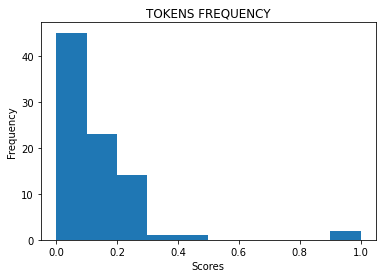

In [5]:
import matplotlib.pyplot as plt
import numpy as np

interesting_token = list()
for token, freq in word_freq.most_common(5):
    interesting_token.append(token)

sentences = list(doc.sents)
token_count = list()
word_count = list()
whole_sents = list()
token_scores = list()
for sentence in sentences:
    tcount = 0
    wcount = 0
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    whole_sents.append(sent_str)
    for token in sentence:
        if not (token.is_space or token.is_punct or token.is_stop):
            wcount += 1
        if token.text.lower() in interesting_token:
            tcount +=1
    token_count.append(tcount)
    word_count.append(wcount)

    token_scores = [i / j for i, j in zip(token_count,word_count)]
    
#uncomment to view results
#print(token_count)
#print(word_count)
#print(token_scores)

xt = np.array(token_scores)  
plt.hist(xt)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('TOKENS FREQUENCY')
plt.show()

# The most common token scores are between 0.0 and 0.1, with the vast majority falling between 0.0 and 0.25.

# Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

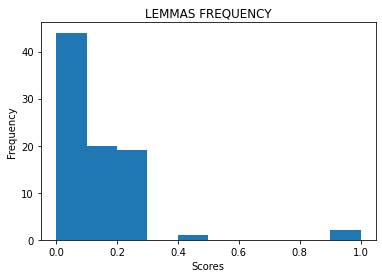

In [6]:
import matplotlib.pyplot as plt
import numpy as np

interesting_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemmas.add(lemma)

sentences = list(doc.sents)
lemma_count = list()
word_count = list()
whole_sents = list()
lemma_scores = list()
for sentence in sentences:
    lcount = 0
    wcount = 0
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    whole_sents.append(sent_str)
    for token in sentence:
        if not (token.is_space or token.is_punct or token.is_stop):
            wcount += 1
        if token.lemma_.lower() in interesting_lemmas:
            lcount +=1
    lemma_count.append(lcount)
    word_count.append(wcount)
    
lemma_scores = [i / j for i, j in zip(lemma_count,word_count)]

#uncomment to view results
#print(lemma_count)
#print(word_count)
#print(lemma_scores)
#print(whole_sents)

xl = np.array(lemma_scores)  
plt.hist(xl)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('LEMMAS FREQUENCY')
plt.show()

# The most common range of lemma scores is between 0.0 and 0.1, with the vast majority falling between 0.0 and 0.25.

# Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.21
* Cutoff Score (lemmas): 0.23

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

# Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [7]:
cutoff = 0.22
token_summary = list()

tsum_scores = [x for x in token_scores if x >= cutoff]

for sentence in sentences:
    if tsum_scores in token_scores:
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        token_summary.append(sent_str)

print(tsum_scores)
print(' '.join(token_summary))

[0.2222222222222222, 0.2857142857142857, 0.2222222222222222, 0.3333333333333333, 0.2222222222222222, 1.0, 0.2777777777777778, 0.23076923076923078, 0.4, 1.0]



# Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [8]:
doc = nlp(' '.join(token_summary))
print("Polarity: ", doc._.blob.polarity)
print("Sentence Count: ", len(sentences))

Polarity:  0.0
Sentence Count:  86


# Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
cutoff = 0.23
lemma_summary = list()

lsum_scores = [x for x in lemma_scores if x >= cutoff]

for sentence in sentences:
    if lemma_scores in lsum_scores:
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        lemma_summary.append(sent_str)

print(lsum_scores)
print(' '.join(lemma_summary))

[0.25925925925925924, 0.2857142857142857, 0.23076923076923078, 0.23076923076923078, 0.2857142857142857, 1.0, 0.25, 0.23076923076923078, 0.4, 0.25, 1.0]



# Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
doc = nlp(' '.join(lemma_summary))
print("Polarity: ", doc._.blob.polarity)
print("Sentence Count: ", len(sentences))

Polarity:  0.0
Sentence Count:  86


# Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

# Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?